In [6]:
import codecs
import os
!pip install zipfile36
import zipfile36

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
zip_corpus = zipfile36.ZipFile('corpus_reviews.zip', 'r')
zip_corpus.extractall('corpus_data')

In [8]:
def extract_data(info):
    data = []
    for file in os.listdir(info):
        text = open(os.path.join(info, file), 'r', encoding = 'utf-8').read()
        data.append(text)
    return data

In [9]:
data = extract_data('corpus_data/lemmatized_senti_mu')

In [12]:
PATH = 'corpus_data/lemmatized_senti_mu'
NUM_TOPICS = 10
N_FIRST = 20 # сколько первых слов на тему выводить
MIN_DF = 5 # минимальное число вхождений слова в документ, чтобы мы его учитывали (включали в вектор документа)
MAX_DF = 0.90 # в каком проценте документов должно присутствовать слово, чтобы оно не рассматривалось
STW_PATH = 'swl_optimum.txt' # путь к документу со стоп-словами

In [13]:
with codecs.open(STW_PATH, encoding = 'utf-8') as f:
    stw_list = f.read().split()[1:] # тк первый символ - что-то странное: \ufeffа 

In [14]:
file_names = os.listdir(PATH) 
data = []
for name in file_names:
    if name.endswith(".txt"):
        with codecs.open(PATH + "/" + name, encoding = 'utf-8') as f:
            data.append(f.read())
            # each document should contain lemmatized words separated by spaces

In [15]:
count_vectorizer = CountVectorizer(min_df=MIN_DF, max_df=MAX_DF, stop_words = stw_list)
data_count_vectorized = count_vectorizer.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['авт', 'адм', 'ак', 'акад', 'богу', 'бу', 'буль', 'вашему', 'вв', 'вкз', 'вост', 'всякому', 'гг', 'го', 'гор', 'гос', 'гр', 'деп', 'дисс', 'дол', 'долл', 'другому', 'европ', 'ежедн', 'ей', 'елки', 'жа', 'жен', 'зап', 'заруб', 'изд', 'иному', 'иностр', 'инст', 'канд', 'кв', 'кей', 'кис', 'корп', 'кэй', 'ля', 'мин', 'миним', 'мое', 'моему', 'моск', 'муж', 'нашему', 'нед', 'нить', 'палки', 'паф', 'пер', 'пиф', 'пос', 'пп', 'пр', 'просп', 'руб', 'своему', 'сек', 'спб', 'стр', 'твоему', 'тел', 'терр', 'тик', 'тов', 'тра', 'тс', 'тт', 'ту', 'тыс', 'ул', 'чегой', 'черт', 'чик', 'чтой', 'экз', 'яй'] not in stop_words.
  % sorted(inconsistent)


In [16]:
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20, learning_method='batch', batch_size=512, random_state = 2)
lda_model.fit_transform(data_count_vectorized);

In [17]:
# print function
all_topics = []
def print_topics(model, vectorizer, top_n=N_FIRST):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        all_topics.append([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [18]:
print_topics(lda_model, count_vectorizer)

Topic 0:
[('книга', 257.13926703998925), ('быть', 246.29750044803288), ('герой', 164.50377943266784), ('роман', 132.04962722984192), ('два', 131.87379512490853), ('ещё', 114.14039245664576), ('ребёнок', 113.88544960250196), ('positive', 95.56363146230302), ('друг', 94.0126214795922), ('человек', 91.52503873877991), ('год', 90.4195007486774), ('мир', 88.53760792578747), ('история', 87.83990789614683), ('автор', 87.52927178461589), ('часть', 72.47633955816687), ('читать', 70.07312266048326), ('главный', 66.77624031934093), ('прочитать', 65.06985900211629), ('игра', 63.64983551843387), ('новый', 56.79210724928367)]
Topic 1:
[('the', 58.82699132622084), ('книга', 45.01871649576265), ('героиня', 25.696161433738943), ('and', 25.0999858452932), ('is', 25.099975309379488), ('positive', 24.863365899372262), ('to', 23.099968764519662), ('автор', 19.6332716113179), ('быть', 18.200550236216603), ('of', 18.097676982853997), ('есть', 17.870899848938375), ('два', 17.830539269199868), ('in', 16.100041

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('книга', 63.6172440923975), ('детектив', 62.105635699883806), ('история', 44.52884199612171), ('рассказ', 42.509317648498175), ('быть', 42.45097887367303), ('ещё', 35.57794731466453), ('автор', 32.70717334804641), ('год', 29.687869734391757), ('positive', 23.763505536662088), ('школа', 23.22824977973194), ('читать', 22.112810922381684), ('человек', 21.99940858332178), ('главный', 21.922020318109162), ('большой', 21.218324055617398), ('прочитать', 20.204896635527934), ('линия', 19.909565382740194), ('произведение', 19.26220658164404), ('убийство', 18.52732523220319), ('девочка', 17.782913040612886), ('секта', 17.68866103443166)]
Topic 3:
[('книга', 150.94557708854197), ('человек', 133.8933030437466), ('быть', 77.726017740596), ('жизнь', 62.231235395079835), ('мир', 58.54225701298901), ('автор', 53.73423014941324), ('positive', 42.655771073308536), ('роман', 41.7773240290706), ('герой', 38.125746185622134), ('история', 37.88602404934274), ('есть', 34.442917249907566), ('произведение', 

In [19]:
for i,topic in enumerate(all_topics):
    print("-------------------------------")
    print("Тема ",i)
    for pair in topic:
        print(pair[0])

-------------------------------
Тема  0
книга
быть
герой
роман
два
ещё
ребёнок
positive
друг
человек
год
мир
история
автор
часть
читать
главный
прочитать
игра
новый
-------------------------------
Тема  1
the
книга
героиня
and
is
positive
to
автор
быть
of
есть
два
in
люси
negative
литература
произведение
жизнь
её
человек
-------------------------------
Тема  2
книга
детектив
история
рассказ
быть
ещё
автор
год
positive
школа
читать
человек
главный
большой
прочитать
линия
произведение
убийство
девочка
секта
-------------------------------
Тема  3
книга
человек
быть
жизнь
мир
автор
positive
роман
герой
история
есть
произведение
стать
любовь
идея
понравиться
главный
год
вера
тема
-------------------------------
Тема  4
книга
быть
автор
человек
ещё
читать
история
есть
роман
время
жизнь
два
хороший
прочитать
мир
конец
герой
сюжет
сказать
написать
-------------------------------
Тема  5
книга
быть
автор
читать
герой
ещё
написать
большой
человек
история
прочитать
интересный
neutral
хороший
pos

In [28]:
# визуализация
import pyLDAvis.sklearn

#import sklearn.pyLDAvis
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_count_vectorized, count_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  32.508782
6       0.648955  71.707100       2        1  17.667887
4      71.019684   9.971006       3        1  13.565366
8       3.785981  33.185135       4        1  11.779529
0     -42.666500  -9.222070       5        1   8.107475
5      -3.621689 -43.526516       6        1   6.487745
3      -3.632402  -4.171708       7        1   4.222828
2     -36.584400  35.804413       8        1   2.709456
1      44.391380  50.615383       9        1   1.570023
7      40.235809 -31.591665      10        1   1.380911, topic_info=         Term         Freq        Total Category  logprob  loglift
1721    книга  3830.000000  3830.000000  Default  30.0000  30.0000
5298  человек  1289.000000  1289.000000  Default  29.0000  29.0000
374      быть  3308.000000  3308.000000  Default  28.0000  28.0000
105     автор  1524.000000  1524.000000  Default  27.0000  27.0000
797   героиня   426.000000   426.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
2370   начало     5.803234   235.906562  Topic10  -5.9759   0.5774
1183     есть     6.670953   802.331940  Topic10  -5.8366  -0.5073
1226    жизнь     6.665021   851.147241  Topic10  -5.8375  -0.5673
5331   читать     6.671912   942.215593  Topic10  -5.8364  -0.6679
4611    стать     5.959898   429.407937  Topic10  -5.9493   0.0051

[792 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2         1  0.282338   100
2         2  0.047056   100
2         4  0.399979   100
2         5  0.047056   100
2         7  0.023528   100
...     ...       ...   ...
5480      6  0.969836    як
5482      1  0.133160   янг
5482      2  0.754574   янг
5482      7  0.088773   янг
5492      1  0.942982  яхта

[2321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 5, 9, 1, 6, 4, 3, 2, 8])

In [29]:
lda_model.perplexity(data_count_vectorized)

2439.56512309503

In [31]:
#gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [33]:
data_texts = [[text for text in doc.split()] for doc in data]

In [34]:
# тексты без стоп-слов
texts_no_stop = []
for text in data_texts:
    text_no_stop = []
    for t in text:
        if t not in stw_list and t != '``' and t != '\'\'' and t.isdigit() == False:
            text_no_stop.append(t) 
    texts_no_stop.append(text_no_stop)

In [35]:
from gensim import corpora

In [36]:
# формируем словарь
dic = corpora.Dictionary(texts_no_stop)

In [37]:
corpus = [dic.doc2bow(line) for line in texts_no_stop]

In [38]:
# LDA gensim
gensim_model = LdaModel(corpus, NUM_TOPICS, dic)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [44]:
gensim_model.print_topics()

[(0,
  '0.018*"книга" + 0.011*"быть" + 0.008*"«" + 0.007*"»" + 0.006*"автор" + 0.005*"..." + 0.005*"год" + 0.005*"–" + 0.004*"сюжет" + 0.004*"герой"'),
 (1,
  '0.015*"книга" + 0.012*"быть" + 0.007*"герой" + 0.006*"автор" + 0.005*"..." + 0.005*"читать" + 0.004*"«" + 0.004*"большой" + 0.004*"»" + 0.003*"сюжет"'),
 (2,
  '0.023*"быть" + 0.013*"книга" + 0.009*"человек" + 0.007*"автор" + 0.006*"герой" + 0.005*"жизнь" + 0.005*"»" + 0.005*"ещё" + 0.004*"сюжет" + 0.004*"..."'),
 (3,
  '0.016*"книга" + 0.012*"быть" + 0.008*"«" + 0.008*"»" + 0.007*"автор" + 0.006*"человек" + 0.005*"..." + 0.005*"ещё" + 0.004*"–" + 0.004*"год"'),
 (4,
  '0.026*"книга" + 0.017*"быть" + 0.008*"автор" + 0.007*"»" + 0.006*"«" + 0.006*"ещё" + 0.005*"история" + 0.005*"время" + 0.005*"читать" + 0.004*"человек"'),
 (5,
  '0.012*"быть" + 0.010*"книга" + 0.006*"автор" + 0.005*"человек" + 0.005*"история" + 0.004*"герой" + 0.004*"ещё" + 0.004*"читать" + 0.003*"часть" + 0.003*"два"'),
 (6,
  '0.015*"книга" + 0.014*"быть" + 0.

In [46]:
# https://radimrehurek.com/gensim/models/coherencemodel.html

coherence_model_lda = CoherenceModel(model=gensim_model, corpus=corpus, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('U-Mass: ', coherence_lda)
#U-Mass:  -1.0371259530353882

U-Mass:  -1.0484784269010683


In [47]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [50]:
import gensim

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sc

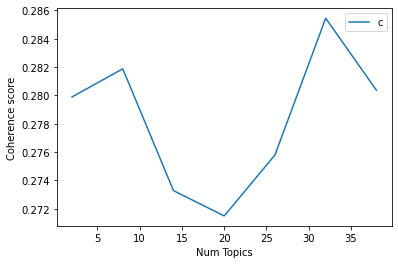

In [51]:
model_list, coherence_values = compute_coherence_values(dictionary=dic, corpus=corpus, texts=texts_no_stop, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()